<a href="https://colab.research.google.com/github/Santhosh261005/Machine-Learning/blob/main/ML_Internal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Lab Internal-2 Preparation**

1. Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.
Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
Compare their performance using evaluation metrics such as accuracy, precision, recall, and
F1-score.
Explore the effect of changing the number of estimators (decision trees) in Random Forest.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

#prediction using single decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
print("Accuracy of the decision tree is :",accuracy_score(y_test, tree_pred))
print("F1 score of the decision tree is :",f1_score(y_test, tree_pred))
print("Precison score of the decision tree is :",precision_score(y_test, tree_pred))

print("......")
# Prediction using Random Forest Classifier...multiple decision trees
model = RandomForestClassifier(n_estimators = 100,criterion = "gini",random_state = 42)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
print("Accuracy of the RandomforestClassifier is :", accuracy_score(model_pred,y_test))
print("F1 score of the RandomforestClassifier is :",f1_score(y_test, model_pred))
print("Precison score of the RandomforestClassifier is :",precision_score(y_test, model_pred))



Accuracy of the decision tree is : 0.94
F1 score of the decision tree is : 0.9425287356321839
Precison score of the decision tree is : 0.9318181818181818
......
Accuracy of the RandomforestClassifier is : 0.968
F1 score of the RandomforestClassifier is : 0.9694656488549618
Precison score of the RandomforestClassifier is : 0.9548872180451128


2. Write a program that demonstrates the use of simple ensemble techniques: Max Voting,
Average Voting, and Weighted Average Voting (assign weights based on each model’s
performance).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42) # SVC needs probability=True for average voting

# Train individual classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Max Voting
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred_max_voting = eclf1.predict(X_test)
print("Max Voting Accuracy:", accuracy_score(y_test, y_pred_max_voting))

print("-" * 20)

# Average Voting
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
y_pred_avg_voting = eclf2.predict(X_test)
print("Average Voting Accuracy:", accuracy_score(y_test, y_pred_avg_voting))

print("-" * 20)

# Weighted Average Voting (example weights - you can adjust these based on individual model performance)
# Let's get the accuracy of individual models on the test set to determine weights
acc1 = accuracy_score(y_test, clf1.predict(X_test))
acc2 = accuracy_score(y_test, clf2.predict(X_test))
acc3 = accuracy_score(y_test, clf3.predict(X_test))

weights = [acc1, acc2, acc3] # Using accuracies as weights

eclf3 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft', weights=weights)
eclf3 = eclf3.fit(X_train, y_train)
y_pred_weighted_avg_voting = eclf3.predict(X_test)
print("Weighted Average Voting Accuracy:", accuracy_score(y_test, y_pred_weighted_avg_voting))

Max Voting Accuracy: 0.9133333333333333
--------------------
Average Voting Accuracy: 0.9
--------------------
Weighted Average Voting Accuracy: 0.91



Like when a sample is given to predict..it combines the decision of all the three models in case of hard voting and majority one it will give as output...is that true ?
Yes, that's exactly right for hard voting (Max Voting)!

When you use voting='hard' in the VotingClassifier, for each sample you want to predict:

Each individual classifier in the ensemble makes its own prediction (i.e., assigns the sample to a specific class).
The VotingClassifier counts the votes for each class from all the individual classifiers.
The class that receives the most votes is the final prediction of the ensemble for that sample.
It's like a democratic process where each model gets a vote, and the majority wins.

3.Write a program to show the difference between Hard Voting and Soft Voting classifiers in
ensemble learning using multiple base learners (e.g., Decision Tree, Logistic Regression, and
KNN).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data (if not already available)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()

# Train individual classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Hard Voting
eclf_hard = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')
eclf_hard = eclf_hard.fit(X_train, y_train)
y_pred_hard = eclf_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

print("-" * 20)

# Soft Voting
# Note: Not all classifiers support predict_proba. KNN does by default, but you might need to enable it for others.
eclf_soft = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='soft')
eclf_soft = eclf_soft.fit(X_train, y_train)
y_pred_soft = eclf_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

Hard Voting Accuracy: 0.9
--------------------
Soft Voting Accuracy: 0.89


4. Write a program using the RandomForestRegressor model to make predictions on a
suitable regression dataset.
Enable and observe the oob_score (Out-of-Bag score) parameter.
Interpret the results and explain its significance.

In [1]:
# 🌳 RandomForestRegressor with OOB Score

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: Generate a synthetic regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=5,
    noise=10,
    random_state=42)

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 3: Initialize RandomForestRegressor with OOB enabled
rf = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,         # enable Out-of-Bag score
    random_state=42,
    bootstrap=True          # must be True for OOB to work
)

# Step 4: Train the model
rf.fit(X_train, y_train)

# Step 5: Predictions on test set
y_pred = rf.predict(X_test)

# Step 6: Evaluate performance
test_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 7: Display results
print("✅ Random Forest Regression Results")
print("----------------------------------")
print(f"OOB Score: {rf.oob_score_:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


✅ Random Forest Regression Results
----------------------------------
OOB Score: 0.8927
Test R² Score: 0.8876
Mean Squared Error: 430.60


5. Write a program to explore different Boosting techniques using suitable datasets:
Adaptive Boosting (AdaBoost) – binary classification.

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Create a synthetic binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.05,
    random_state=42
)

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Create AdaBoost model (using decision stumps as weak learners)
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Step 5: Train model
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate model
print("✅ AdaBoost Results")
print("------------------")
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



✅ AdaBoost Results
------------------
Training Accuracy: 0.8771428571428571
Testing Accuracy : 0.8466666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        72
           1       0.82      0.90      0.86        78

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.85       150
weighted avg       0.85      0.85      0.85       150



👉 base_estimator (the DecisionTreeClassifier) is the type of learner, not the only one used.
AdaBoost will internally create 50 such learners (since n_estimators=50).

7. Implement all the clustering distance measures (similarity measures)

In [4]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import make_blobs

# Generate synthetic data (just 5 sample points, 2D)
X, _ = make_blobs(n_samples=5, centers=2, random_state=0)
print("Data points:\n", X)

# 1️⃣ Euclidean Distance
euclidean = pairwise_distances(X, metric='euclidean')
print("\nEuclidean Distance:\n", np.round(euclidean, 2))

# 2️⃣ Manhattan Distance
manhattan = pairwise_distances(X, metric='manhattan')
print("\nManhattan Distance:\n", np.round(manhattan, 2))

# 3️⃣ Cosine Similarity
cosine = cosine_similarity(X)
print("\nCosine Similarity:\n", np.round(cosine, 2))

# 4️⃣ Minkowski Distance (p=3 here)
minkowski = pairwise_distances(X, metric='minkowski', p=3)
print("\nMinkowski Distance (p=3):\n", np.round(minkowski, 2))

# 5️⃣ Jaccard Index (convert to 0/1 binary just for demo)
binary_X = np.where(X > X.mean(), 1, 0)
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(binary_X[0], binary_X[1])
print("\nJaccard Index (between point 0 & 1):", round(jaccard, 2))


Data points:
 [[0.87305123 4.71438583]
 [2.19931109 2.35193717]
 [2.81630525 1.01933868]
 [1.9263585  4.15243012]
 [2.84382807 3.32650945]]

Euclidean Distance:
 [[0.   2.71 4.17 1.19 2.41]
 [2.71 0.   1.47 1.82 1.17]
 [4.17 1.47 0.   3.26 2.31]
 [1.19 1.82 3.26 0.   1.23]
 [2.41 1.17 2.31 1.23 0.  ]]

Manhattan Distance:
 [[0.   3.69 5.64 1.62 3.36]
 [3.69 0.   1.95 2.07 1.62]
 [5.64 1.95 0.   4.02 2.33]
 [1.62 2.07 4.02 0.   1.74]
 [3.36 1.62 2.33 1.74 0.  ]]

Cosine Similarity:
 [[1.   0.84 0.51 0.97 0.87]
 [0.84 1.   0.89 0.95 1.  ]
 [0.51 0.89 1.   0.7  0.87]
 [0.97 0.95 0.7  1.   0.96]
 [0.87 1.   0.87 0.96 1.  ]]

Minkowski Distance (p=3):
 [[0.   2.49 3.87 1.1  2.18]
 [2.49 0.   1.38 1.8  1.06]
 [3.87 1.38 0.   3.16 2.31]
 [1.1  1.8  3.16 0.   1.1 ]
 [2.18 1.06 2.31 1.1  0.  ]]

Jaccard Index (between point 0 & 1): 0.0


8. Implement hierarchical clustering : agglomerative (BIRCH and CHAMELEON)

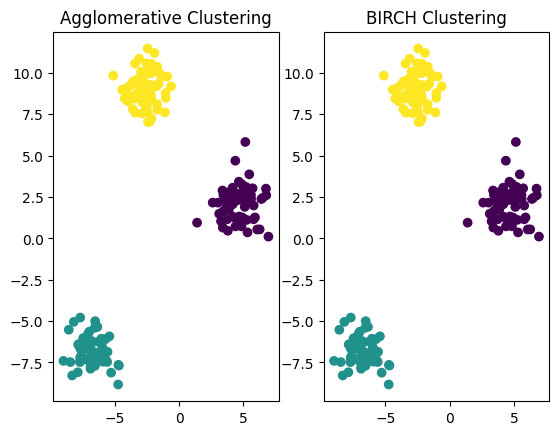

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, Birch
import matplotlib.pyplot as plt

# Create synthetic dataset
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# 1️⃣ Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)

# 2️⃣ BIRCH Clustering
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X)

# Plot Agglomerative result
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels)
plt.title("Agglomerative Clustering")

# Plot BIRCH result
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=birch_labels)
plt.title("BIRCH Clustering")

plt.show()


9. Implement Types of Linkages
Single Linkage
Complete Linkage
Average Linkage
Ward's Linkage
Centroid-Linkage

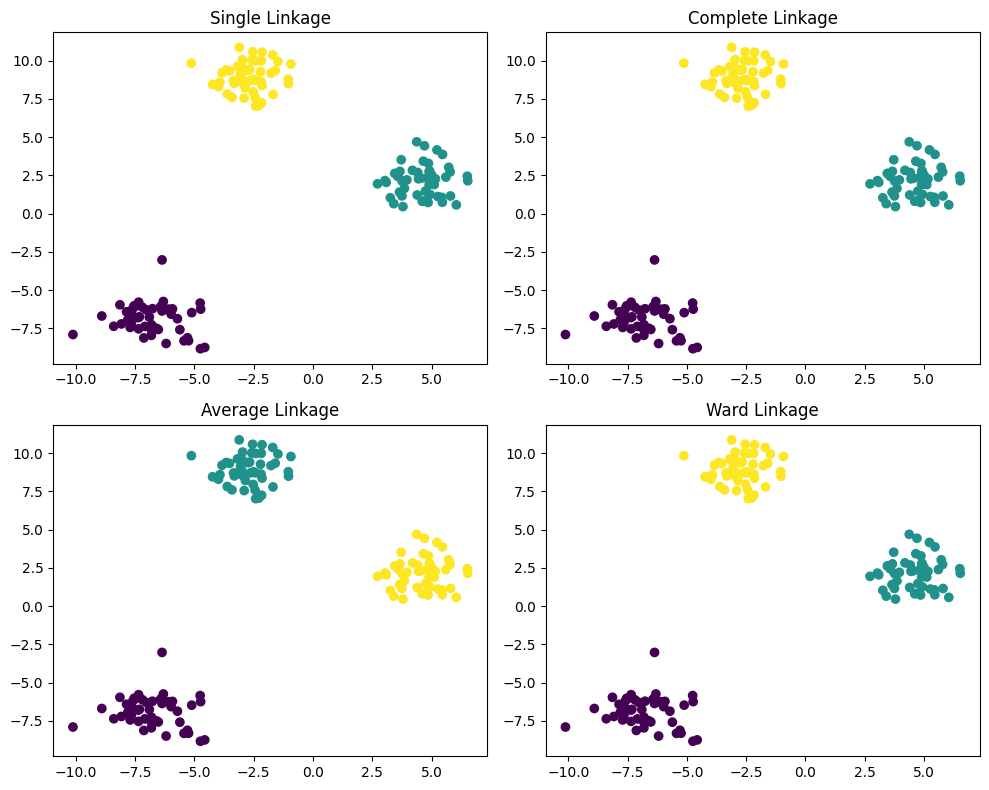

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create synthetic dataset
X, _ = make_blobs(n_samples=150, centers=3, random_state=42)

# Linkage types to compare
linkages = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(10, 8))

for i, link in enumerate(linkages, 1):
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    labels = model.fit_predict(X)
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.title(f"{link.capitalize()} Linkage")

plt.tight_layout()
plt.show()


10. Implement DBSCAN clustering

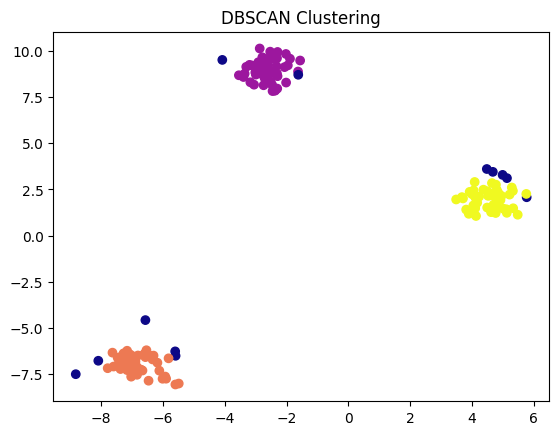

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Create synthetic dataset
X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.6, random_state=42)

# Step 2: Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

# Step 3: Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


11.Implement Spectral Clustering

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


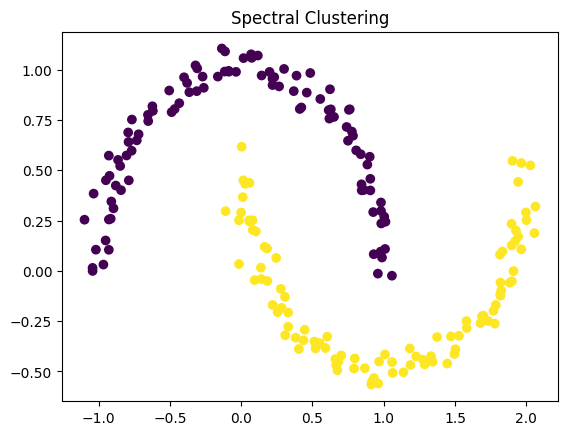

In [8]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Step 1: Create synthetic dataset
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Step 2: Apply Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
labels = sc.fit_predict(X)

# Step 3: Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()
